# H1N1 Vaccination Prediction using Machine Learning Models

## 1) Synopsis :


In this problem statement it is asked to predict whether a person has recieved vaccination for H1N1, based on information they shared about their backgrounds, opinions, and health behaviors, for example :

- Awareness about h1n1 infection
- Is the person avoiding contact with other people?
- Usage of face mask, washing hands properly
- Has the person taken antiviral medication
- Does the person avoid going to large public gatherings?
- The individual's opinion on Vaccination
- Their income level, Place where they live

Here the data provided is categorical mainly so we are going to use Classification as the analytical approach


## 2) Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

## 3) Loading the Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv") 

## 4) Data Understanding and Cleaning

In [3]:
df.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
df.shape

(26707, 34)

In [7]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [8]:
### Checking for missing values
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [9]:
df.isna().sum().sum()

33962

#### There are 33962 missing values in the dataset
- The column has_health_insur has hightest number of missing values
- Almost all columns have missing values
- depending on number of missing values, the columns will be either kept or dropped

In [10]:
### dropping the health insurance related column
df.drop("has_health_insur",axis=1,inplace=True)

In [11]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [12]:
df.isnull().sum()

unique_id                       0
h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

#### Removing columns having more than 1000 missing values

In [13]:
for col in df.columns :
    temp=df[col].isnull().sum()
    if temp >1000 :
        df.drop(col,axis=1,inplace=True)

In [14]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
race                          object
sex                           object
census_msa                    object
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
dtype: object

In [15]:
### Encoding categorical data

In [16]:
###df=pd.get_dummies(columns=["age_bracket","race","sex","census_msa"],data=df)

In [17]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
race                          object
sex                           object
census_msa                    object
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
dtype: object

In [18]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'race', 'sex',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [19]:
df.isnull().sum()

unique_id                      0
h1n1_worry                    92
h1n1_awareness               116
antiviral_medication          71
contact_avoidance            208
bought_face_mask              19
wash_hands_frequently         42
avoid_large_gatherings        87
reduced_outside_home_cont     82
avoid_touch_face             128
chronic_medic_condition      971
cont_child_undr_6_mnths      820
is_health_worker             804
is_h1n1_vacc_effective       391
is_h1n1_risky                388
sick_from_h1n1_vacc          395
is_seas_vacc_effective       462
is_seas_risky                514
sick_from_seas_vacc          537
age_bracket                    0
race                           0
sex                            0
census_msa                     0
no_of_adults                 249
no_of_children               249
h1n1_vaccine                   0
dtype: int64

#### Programming a loop to replace missing values

In [20]:
x=df["sex"].dtype
print(x)

object


In [21]:
for col in df.columns :
    temp=df[col].isnull().sum()
    if df[col].dtype=='object' :
            pass
    else :
        if temp !=0 :
            df_column=df.dropna(axis=0,subset=[col],how="any")
            m=df[col].mean()
            df[col].fillna(m,inplace=True)
        

In [22]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
race                         0
sex                          0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

#### All missing values are dealt with

In [23]:
#### Checking for duplicate values
duplicate=df.duplicated()
print(duplicate.sum())

0


In [24]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
race                          object
sex                           object
census_msa                    object
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
dtype: object

## 5) Data Visualization

In [25]:
#### different plots describing various patterns in the dataset

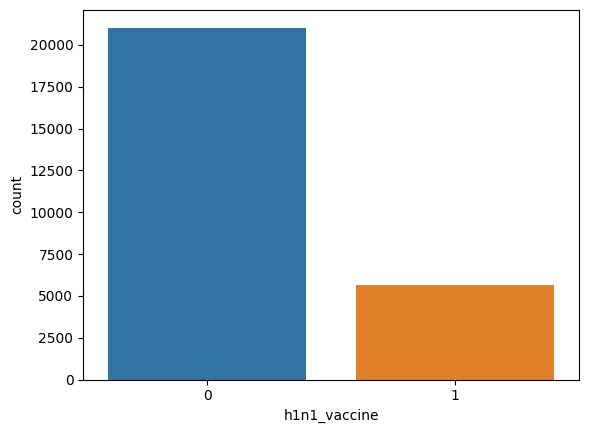

In [26]:
sns.countplot(x="h1n1_vaccine",data=df)
plt.show()

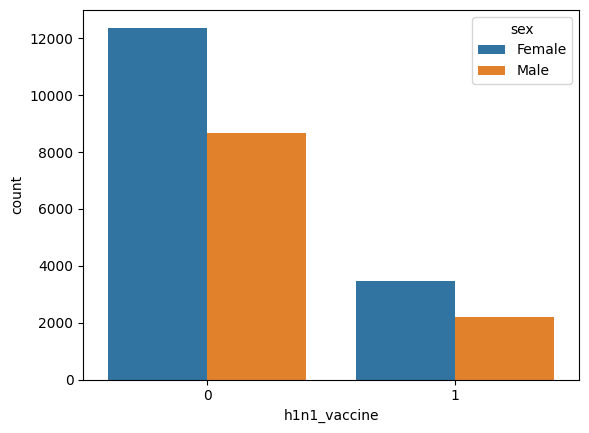

In [27]:
sns.countplot(x="h1n1_vaccine",hue="sex",data=df)
plt.show()

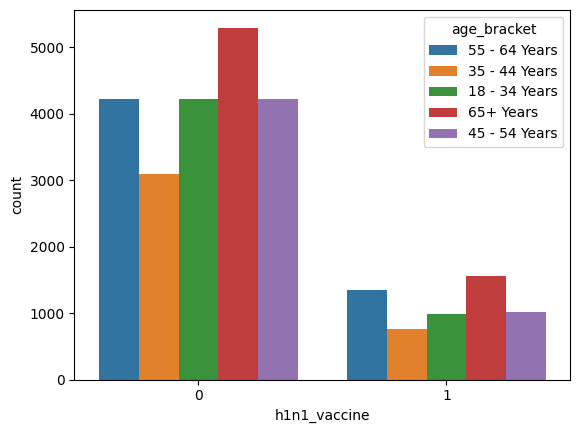

In [28]:
sns.countplot(x="h1n1_vaccine",hue="age_bracket",data=df)
plt.show()

<AxesSubplot: xlabel='h1n1_vaccine', ylabel='count'>

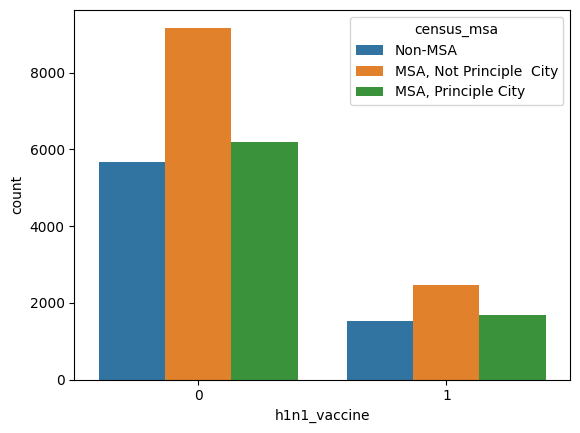

In [29]:
sns.countplot(x="h1n1_vaccine",hue="census_msa",data=df)

<AxesSubplot: xlabel='h1n1_worry', ylabel='count'>

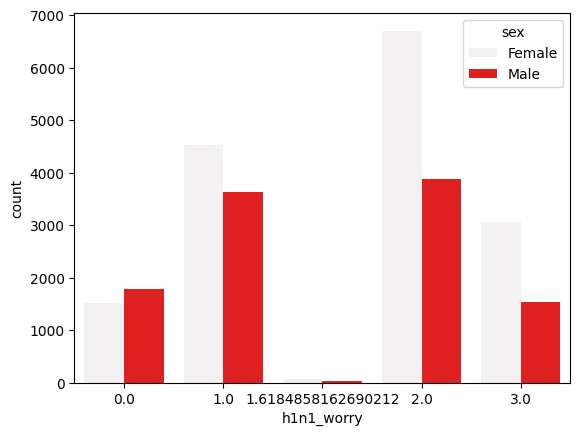

In [30]:
sns.countplot(x="h1n1_worry", data=df,color='red',hue="sex")

<AxesSubplot: xlabel='h1n1_vaccine', ylabel='count'>

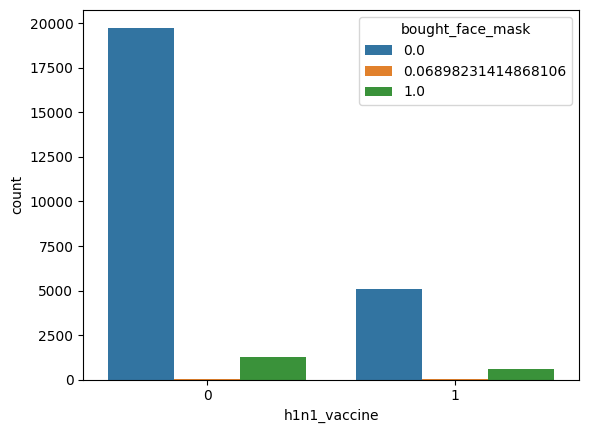

In [31]:
sns.countplot(x="h1n1_vaccine",hue="bought_face_mask",data=df)

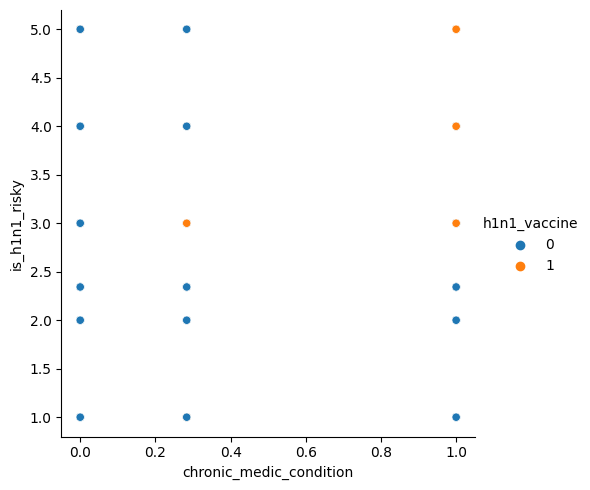

In [32]:
sns.relplot(x="chronic_medic_condition", y="is_h1n1_risky", data=df,color='red',hue="h1n1_vaccine")

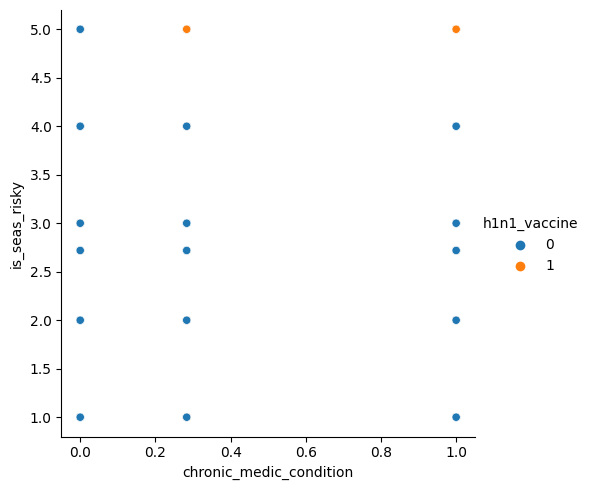

In [33]:
sns.relplot(x="chronic_medic_condition", y="is_seas_risky", data=df,color='red',hue="h1n1_vaccine")

<AxesSubplot: xlabel='no_of_adults', ylabel='count'>

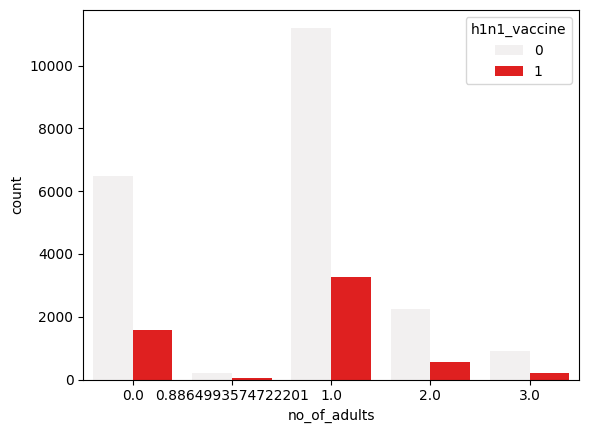

In [34]:
sns.countplot(x="no_of_adults", data=df,color='red',hue="h1n1_vaccine")

<AxesSubplot: xlabel='no_of_children', ylabel='count'>

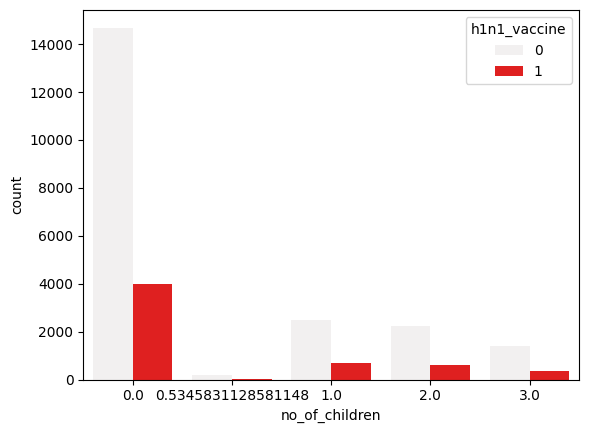

In [35]:
sns.countplot(x="no_of_children", data=df,color='red',hue="h1n1_vaccine")

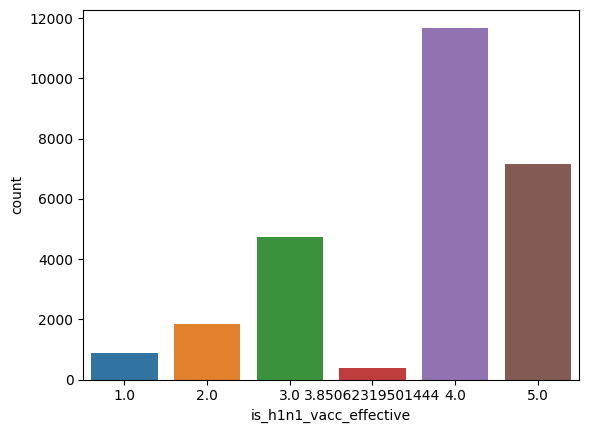

In [36]:
sns.countplot(x="is_h1n1_vacc_effective",data=df)
plt.show()

#### Scatterplot for the dataset

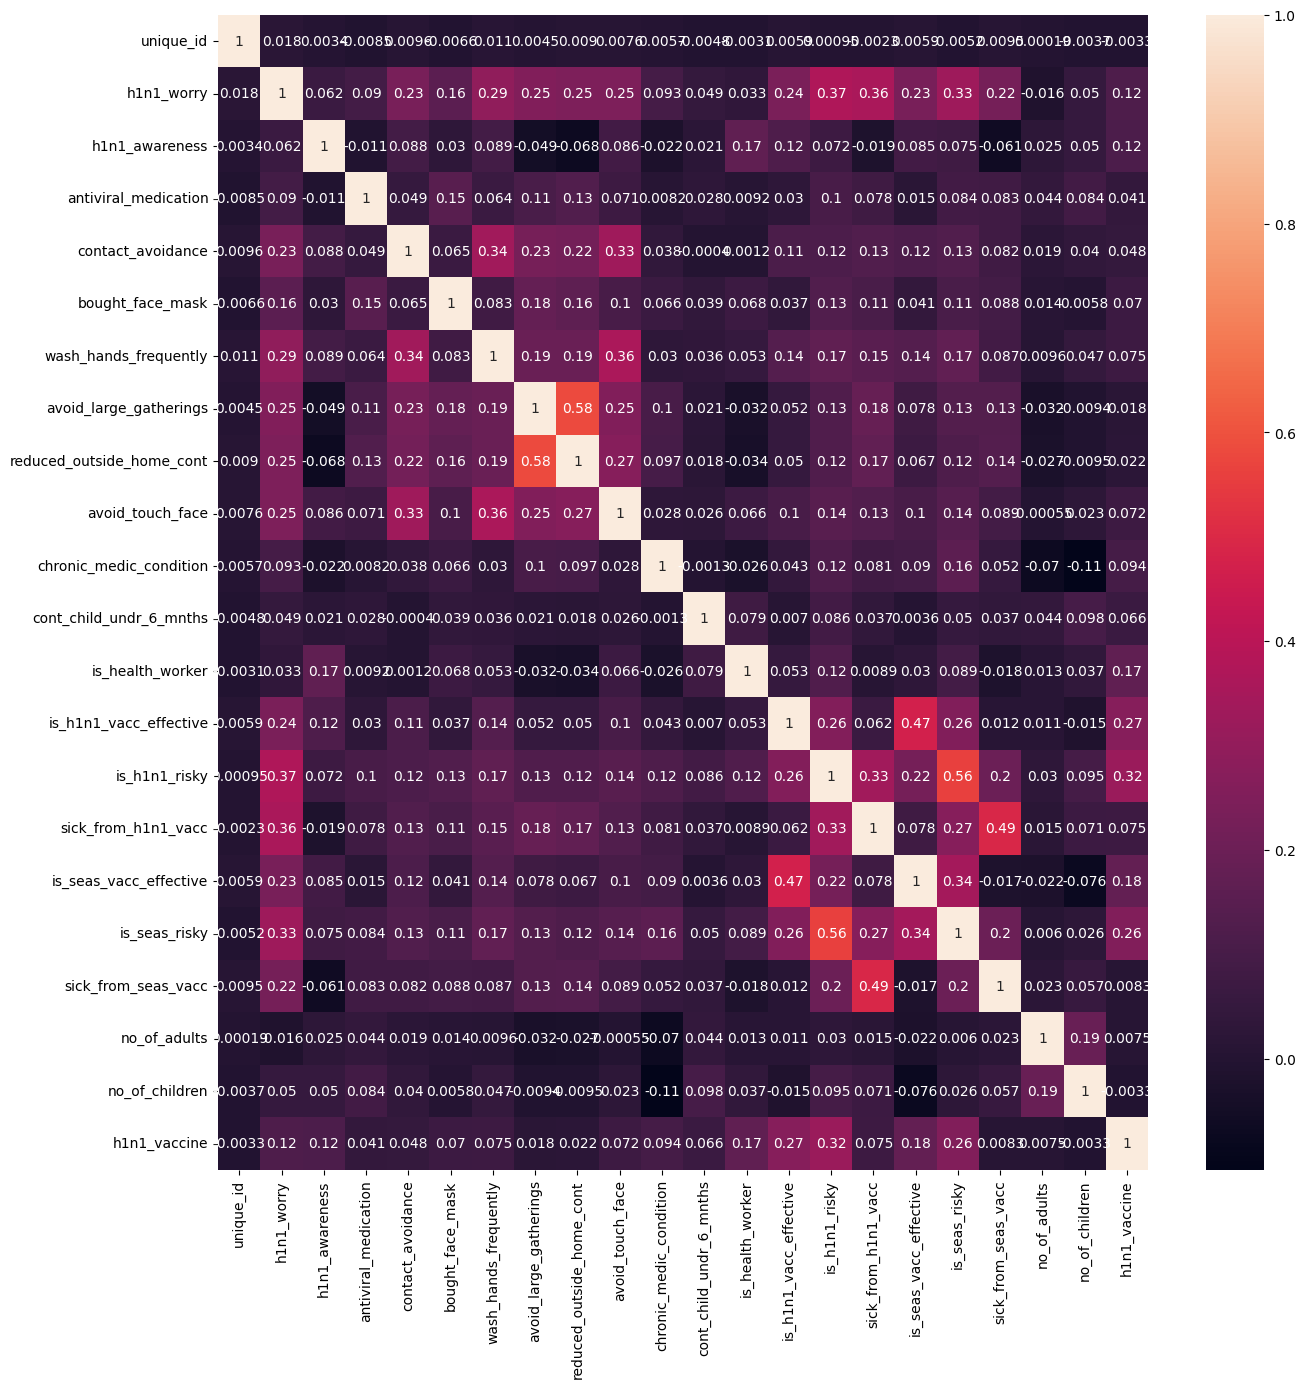

In [37]:
plt.figure(figsize=(15,15));
sns.heatmap(df.corr(),annot=True,);# Rotate x-labels with the help of matplotlib


#### From the above plots, the following conclusions arise :
- A larger number of females are not vaccinated compared to males
- More people are preferring to not take H1n1 vaccine
- But people appear to be affirmative about effectiveness of the vaccine
- number of unvaccinated people are more in households having no children
- unvaccinated people are also majorly not wearing face masks 
- The senior citizens(age 65+) are having highest number in both vaccinated and unvaccinated groups
- In MSA, Non-principle City, people of both categories( vaccinated and unvaccinated) are in highest number

In [38]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
race                          object
sex                           object
census_msa                    object
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
dtype: object

In [39]:
### encoding the categorical data

In [40]:
df=pd.get_dummies(columns=["age_bracket","race","sex","census_msa"],data=df)

In [41]:
df.dtypes

unique_id                                int64
h1n1_worry                             float64
h1n1_awareness                         float64
antiviral_medication                   float64
contact_avoidance                      float64
bought_face_mask                       float64
wash_hands_frequently                  float64
avoid_large_gatherings                 float64
reduced_outside_home_cont              float64
avoid_touch_face                       float64
chronic_medic_condition                float64
cont_child_undr_6_mnths                float64
is_health_worker                       float64
is_h1n1_vacc_effective                 float64
is_h1n1_risky                          float64
sick_from_h1n1_vacc                    float64
is_seas_vacc_effective                 float64
is_seas_risky                          float64
sick_from_seas_vacc                    float64
no_of_adults                           float64
no_of_children                         float64
h1n1_vaccine 

In [42]:
df=df.drop("unique_id",axis=1)

## Building Models

### Logistic Regression

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
x=df.drop("h1n1_vaccine",axis=1)
y=df["h1n1_vaccine"]

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=25)

In [46]:
model1=LogisticRegression(random_state=50,solver='liblinear',C=0.7)

In [47]:
model1.fit(x_train, y_train)

LogisticRegression(C=0.7, random_state=50, solver='liblinear')

In [48]:
model1.score(x_train, y_train)


0.81437894511608

In [49]:
model1.score(x_test,y_test)

0.8172968925496069

In [50]:
predictions=model1.predict(x_test)

In [51]:
accuracy_score(y_test,predictions)

0.8172968925496069

In [52]:
from sklearn import metrics

In [53]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in['1','0']], columns=[i for i in ["Predict 1","Predict 0"]])

<AxesSubplot: >

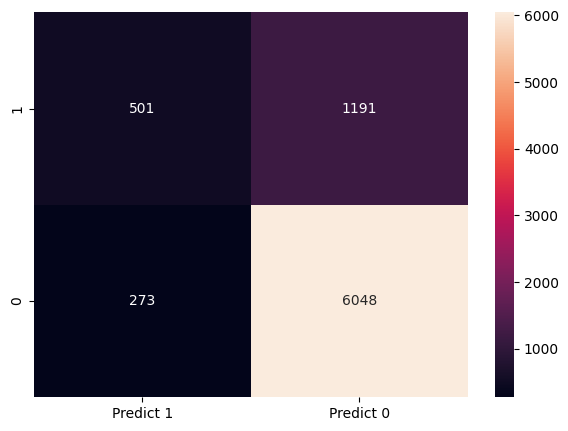

In [54]:
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

### Logistic Regression with Standardization

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler=StandardScaler()

In [57]:
x_scaled=scaler.fit_transform(x_train)

In [58]:
model2=LogisticRegression(random_state=50,solver='liblinear',C=0.7)
model2.fit(x_scaled,y_train)

LogisticRegression(C=0.7, random_state=50, solver='liblinear')

In [59]:
x_testsc=scaler.fit_transform(x_test)

In [60]:
model2.score(x_scaled,y_train)

0.8141649727185193

In [61]:
model2.score(x_testsc,y_test)

0.8166729065268938

In [62]:
predictions=model2.predict(x_test)

In [63]:
accuracy_score(y_test,predictions)

0.22351179333582927

### KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [65]:
xscaled=x.apply(zscore) ###convert all attributes to zscale

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=40)

In [67]:
model3=KNeighborsClassifier(n_neighbors=40, weights='uniform')

In [68]:
### Calling Nearest Neighbour algorithm
model3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [69]:
model3.score(x_train,y_train)

0.8141114796191291

In [70]:
model3.score(x_test,y_test)

0.8130537875951579

In [71]:
predictions=model3.predict(x_test)

In [72]:
accuracy_score(y_test,predictions)

0.8130537875951579

### KNN with standardization

In [73]:
scaler=StandardScaler()

In [74]:
x=df.drop("h1n1_vaccine",axis=1)
y=df["h1n1_vaccine"]

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=40)

In [76]:
x_scaled=scaler.fit_transform(x_train)

In [77]:
model4=KNeighborsClassifier(n_neighbors=40, weights='uniform')

In [78]:
model4.fit(x_scaled,y_train)

KNeighborsClassifier(n_neighbors=40)

In [79]:
model4.score(x_scaled,y_train)

0.8018080667593881

In [80]:
x_testsc=scaler.fit_transform(x_test)

In [81]:
model4.score(x_testsc,y_test)

0.8045675776862599

In [82]:
predictions=model4.predict(x_test)

In [83]:
accuracy_score(y_test,predictions)

0.3600399351054536

### Naive Bayes model

In [84]:
x=df.drop("h1n1_vaccine",axis=1)
y=df["h1n1_vaccine"]

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=40)

In [86]:
model5=GaussianNB()

In [87]:
model5.fit(x_train,y_train)

GaussianNB()

In [88]:
model5.score(x_train,y_train)

0.7432866160265326

In [89]:
model5.score(x_test,y_test)

0.74404093348309

In [90]:
predictions=model5.predict(x_test)

In [91]:
accuracy_score(y_test,predictions)

0.74404093348309

### Naive Bayes model with standardization

In [92]:
scaler=StandardScaler()

In [93]:
x_scaled=scaler.fit_transform(x_train)

In [94]:
x_testsc=scaler.fit_transform(x_test)

In [95]:
model6=GaussianNB()

In [96]:
model6.fit(x_train,y_train)

GaussianNB()

In [97]:
model6.score(x_scaled,y_train)

0.7273991655076495

In [98]:
model6.score(x_testsc,y_test)

0.7336827655060527

In [99]:
predictions=model6.predict(x_test)
accuracy_score(y_test,predictions)

0.74404093348309

### SVC model

In [100]:
x=df.drop("h1n1_vaccine",axis=1)
y=df["h1n1_vaccine"]

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=40)

In [102]:
model7=SVC(kernel='linear',degree=5,coef0=-1,C=0.01)

In [103]:
model7.fit(x_train,y_train)

SVC(C=0.01, coef0=-1, degree=5, kernel='linear')

In [104]:
model7.score(x_train,y_train)

0.7862950679362363

In [105]:
model7.score(x_test,y_test)

0.7904654935729439

In [106]:
predictions=model7.predict(x_test)
accuracy_score(y_test,predictions)

0.7904654935729439

### DecisionTree Classifier model

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
model8=DecisionTreeClassifier(max_depth=5)

In [117]:
model8.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [118]:
model8.score(x_train,y_train)

0.8136835348240077

In [119]:
model8.score(x_test,y_test)

0.8170472981405217

In [120]:
predictions=model8.predict(x_test)
accuracy_score(y_test,predictions)

0.8170472981405217

### Bagging Classifier model

In [121]:
from sklearn.ensemble import BaggingClassifier

In [123]:
model9=BaggingClassifier(n_estimators=20,random_state=30,warm_start=True,max_samples=0.047877)


In [124]:
model9.fit(x_train,y_train)

BaggingClassifier(max_samples=0.047877, n_estimators=20, random_state=30,
                  warm_start=True)

In [125]:
model9.score(x_train,y_train)

0.8176955172782711

In [126]:
model9.score(x_test,y_test)

0.814301759640584

In [127]:
predictions=model9.predict(x_test)
accuracy_score(y_test,predictions)

0.814301759640584

### AdaBoost CLassifier

In [128]:
from sklearn.ensemble import AdaBoostClassifier

In [130]:
model10=AdaBoostClassifier()

In [131]:
model10.fit(x_train,y_train)

AdaBoostClassifier()

In [132]:
model10.score(x_train,y_train)

0.8132020969294961

In [133]:
model10.score(x_test,y_test)

0.8155497316860102

In [134]:
predictions=model10.predict(x_test)
accuracy_score(y_test,predictions)

0.8155497316860102

### Gradient Boost Classifier

In [135]:
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
model11=GradientBoostingClassifier()

In [137]:
model11.fit(x_train,y_train)

GradientBoostingClassifier()

In [138]:
model11.score(x_train,y_train)

0.8202096929496095

In [140]:
model11.score(x_test,y_test)

0.8186696617995757

In [141]:
predictions=model11.predict(x_test)
accuracy_score(y_test,predictions)

0.8186696617995757

### RandomForest Classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
model12=RandomForestClassifier(max_depth=5)

In [145]:
model12.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [146]:
model12.score(x_train,y_train)

0.8018615598587783

In [147]:
model12.score(x_test,y_test)

0.8066891301634843

In [149]:
predictions=model12.predict(x_test)
accuracy_score(y_test,predictions)

0.8066891301634843